<a href="https://colab.research.google.com/github/jamunozlab/introductory_mechanics_fall_2022/blob/main/lecture_notebooks/Ph_2320_W4_L7.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

For the following, please don't forget the age-old advice: "Don't drink and derive."

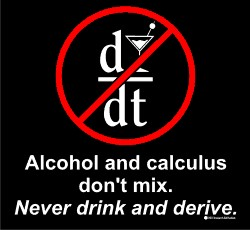

-----

The definition of acceleration is:

$\vec{a} = \frac{d\vec{v}}{dt}$

-----

That means that, doing a bit of algebra:

$\vec{a} dt = d\vec{v}$

-----

The above is an equation, so any operation that you do on both sides will continue being an equality, as you might recall from algebra. Integration is an operation like any other, so doing an integration on both sides, you get:

$\int{\vec{a}} dt = \int{d\vec{v}}$ .
 
-----
 
Since $\int_{v_o}^{v_f}{d\vec{v}} = \vec{v}|_{v_0}^{v_f} = \vec{v}_f - \vec{v}_0$ ,

$\int_{t_o}^{t_f}{\vec{a}} dt = \vec{v}_f - \vec{v}_0$, so

$\vec{v}_f = \vec{v}_0 + \int_{t_o}^{t_f}{\vec{a}} dt$

-----
The equation above says that the final velocity of any object subjected to an acceleration is equal to the initial velocity of the object, plus the area under the curve of its acceleration as a function of time, $\vec{a}(t)$ vs. time plot. In the special case in which $\vec{a}(t)$ is constant, so just a number that affects all values of the integral equally, you can take it out of the integral. This is illustrated graphically below. Notice that the length of the rectangle is $\int_{t_o}^{t_f}dt = t_f - t_0 = \Delta t $, and the height is $\vec{a}$.

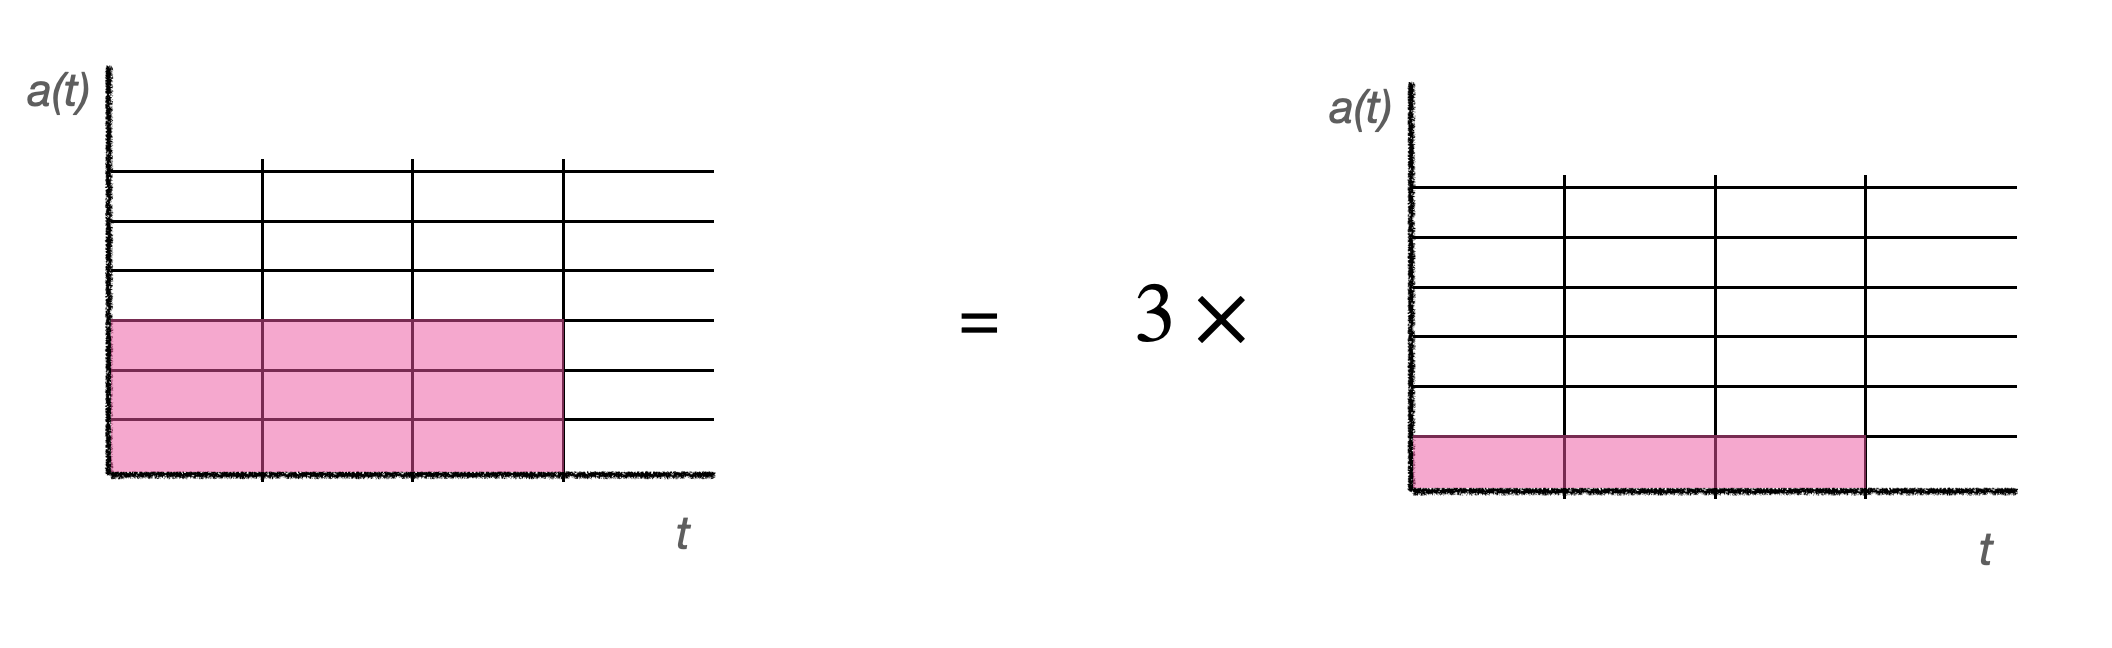

In this special case, $\vec{v}_f = \vec{v}_0 + \vec{a} \Delta t $, the well-known kinematic equation. In order to solve the equation, you need to know 3 out of the following 4 quantities: $\vec{v}_f,  \vec{v}_0, \Delta t, \vec{a}$

----


When the acceleration is not constant, the integral is still the area under the curve, but we need to be smarter to estimate that area. How many squares does the pink area below occupy?

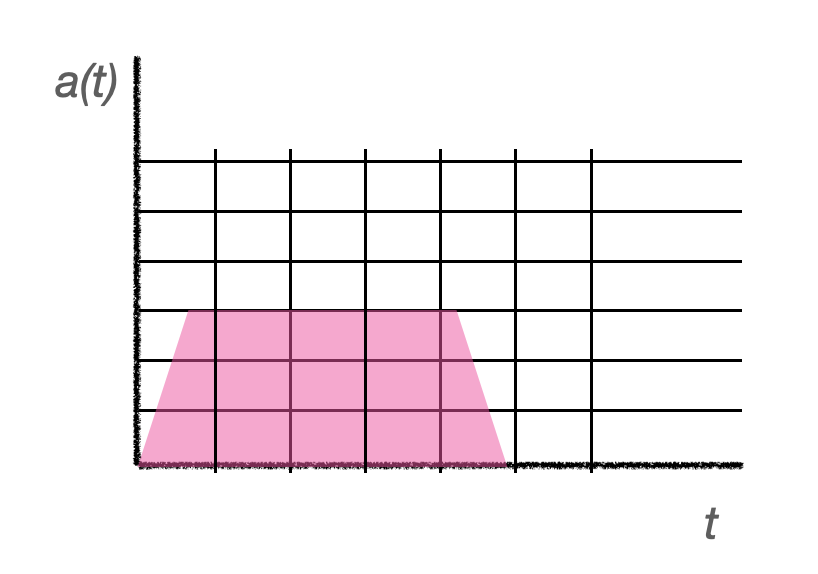

A more quantitative way to do it is by adding the areas of many rectangles of a fixed width, given by a constant $\Delta t$, and height given by the value of the function $\vec{a}(t)$ at some $t$ between the width. Below an illustration. 

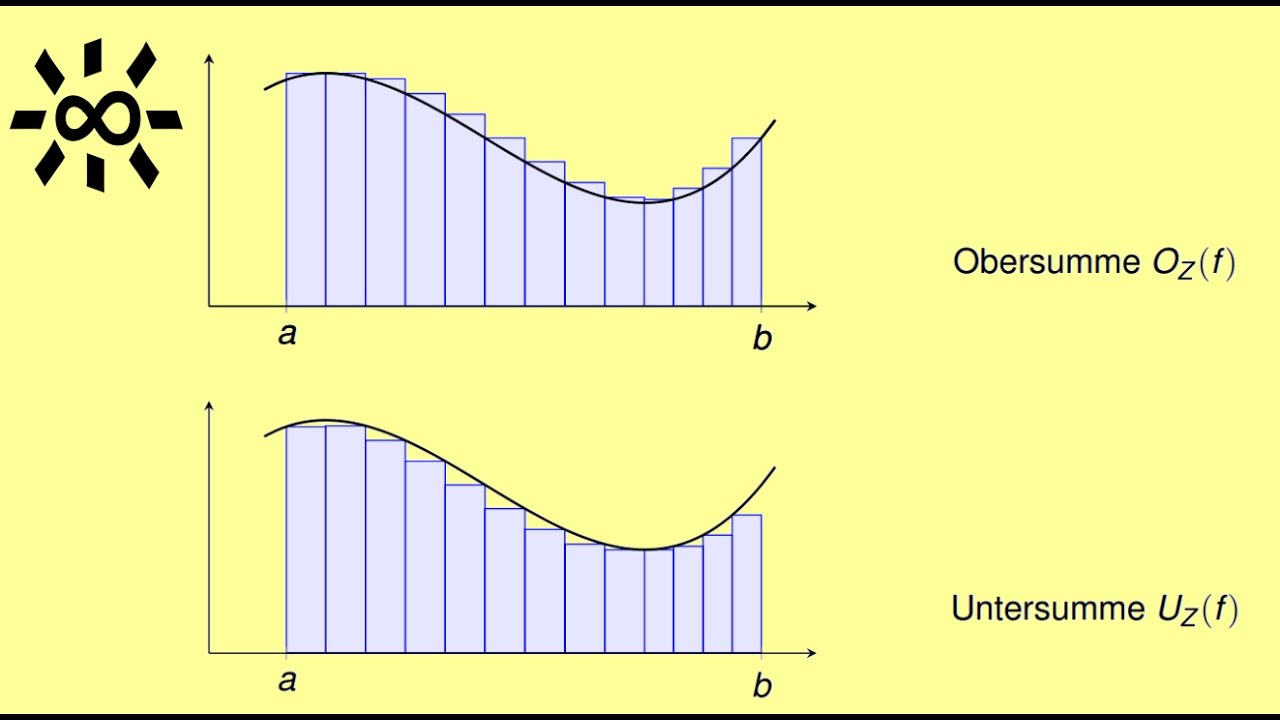

With $\vec{a}(t) = At^2 + Bt + C$, using, $A = 4, B = -5, C = 3$, we get $\vec{a}(t) = 4t^2 - 5t + 3$ meters per second squared.

----

Following the rules of calculus, 

$\int \vec{a}(t) dt$ 

$\int (At^2 + Bt + C)dt $

$\int At^2 dt + \int Bt dt + \int C dt $

$A\int t^2 dt + B\int t dt + C\int dt $

$ \frac{At^3}{3} + \frac{Bt^2}{2} +  \frac{Ct^1}{1} $ plus a constant.

----

Since we are using $A = 4, B = -5, C = 3$, the equation above yields:

$ \frac{4t^3}{3} - \frac{5t^2}{2} +  \frac{3t^1}{1} $ plus a constant

The velocity increase between 0.0 seconds and 2.0 seconds is then:

$ \big[ \frac{4(2.0)^3}{3} - \frac{5(2.0)^2}{2} +  \frac{3(2.0)^1}{1} \big] - \big[ \frac{4(0.0)^3}{3} - \frac{5(0.0)^2}{2} +  \frac{3(0.0)^1}{1} \big]$

$ \frac{32}{3} - \frac{20}{2} + \frac{6}{1} $

$ 10 \frac{2}{3} - 10 + 6$

$10 \frac{2}{3} - 4$

$6 \frac{2}{3} $ meters per second



The code below produces data for the acceleration described above, with each data point separated by 0.1 seconds:

In [69]:
import pandas as pd

In [70]:
A = 4
B = -5
C = 3

time = 0
resolution = 0.1
time_list = []
acceleration_list = []
while time < 2.0:
  time_list.append(time)
  acceleration_list.append((lambda x: A*x**2 + B*x + C)(time))
  time = time + resolution

acceleration_vs_time = pd.Series(acceleration_list, index=time_list)

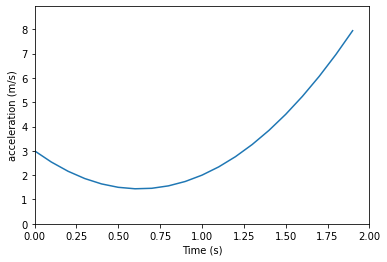

In [71]:
acceleration_vs_time.plot(xlabel = "Time (s)", ylabel = "acceleration (m/s)", xlim=(0, 2), ylim=(0, acceleration_vs_time.max() + 1))

The 'resolution' is the separation in the horizontal axis between data points, in this case 0.1 seconds. This is also the width we will use for our rectangles. We will use the value of the acceleration at a given time as the length of the rectangle for that time. The next cell shows how it looks. The first colum is the time, the second column is the acceleration.

In [72]:
print(acceleration_vs_time)

0.0    3.00
0.1    2.54
0.2    2.16
0.3    1.86
0.4    1.64
0.5    1.50
0.6    1.44
0.7    1.46
0.8    1.56
0.9    1.74
1.0    2.00
1.1    2.34
1.2    2.76
1.3    3.26
1.4    3.84
1.5    4.50
1.6    5.24
1.7    6.06
1.8    6.96
1.9    7.94
dtype: float64


There are 20 rectangles, the areas are the following:

In [73]:
initial_velocity = 0
final_velocity = initial_velocity
for i in range(len(acceleration_vs_time)):
  area_of_rectangle = acceleration_vs_time.iloc[i] * resolution
  final_velocity = final_velocity + area_of_rectangle
  print(area_of_rectangle, "meters per second")

0.30000000000000004 meters per second
0.254 meters per second
0.21600000000000003 meters per second
0.186 meters per second
0.16400000000000003 meters per second
0.15000000000000002 meters per second
0.144 meters per second
0.146 meters per second
0.15600000000000003 meters per second
0.17399999999999993 meters per second
0.2 meters per second
0.23399999999999999 meters per second
0.27599999999999997 meters per second
0.32600000000000007 meters per second
0.3840000000000001 meters per second
0.4500000000000003 meters per second
0.5240000000000002 meters per second
0.6060000000000004 meters per second
0.6960000000000005 meters per second
0.7940000000000005 meters per second


In [74]:
# Adding the areas of all rectangles together
print("Final velocity is:", final_velocity, "meters per second")

Final velocity is: 6.380000000000002 meters per second


6.38 meters per second is pretty close to 6 and 2/3 meters per second obtained analytically, but we can do better if we improve the 'resolution.'

In [75]:
A = 4
B = -5
C = 3

time = 0
resolution = 0.01
time_list = []
acceleration_list = []
while time < 2.0:
  time_list.append(time)
  acceleration_list.append((lambda x: A*x**2 + B*x + C)(time))
  time = time + resolution

acceleration_vs_time = pd.Series(acceleration_list, index=time_list)

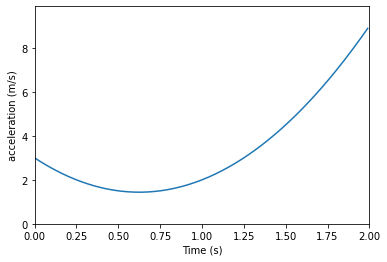

In [76]:
acceleration_vs_time.plot(xlabel = "Time (s)", ylabel = "acceleration (m/s)", xlim=(0, 2), ylim=(0, acceleration_vs_time.max() + 1))

In [77]:
print(acceleration_vs_time)

0.00    3.0000
0.01    2.9504
0.02    2.9016
0.03    2.8536
0.04    2.8064
         ...  
1.95    8.4600
1.96    8.5664
1.97    8.6736
1.98    8.7816
1.99    8.8904
Length: 200, dtype: float64


In [78]:
initial_velocity = 0
final_velocity = initial_velocity
for i in range(len(acceleration_vs_time)):
  area_of_rectangle = acceleration_vs_time.iloc[i] * resolution
  final_velocity = final_velocity + area_of_rectangle
  print(area_of_rectangle, "meters per second")

0.03 meters per second
0.029504000000000002 meters per second
0.029016000000000004 meters per second
0.028536000000000002 meters per second
0.028064000000000002 meters per second
0.0276 meters per second
0.027144 meters per second
0.026696 meters per second
0.026256 meters per second
0.025824 meters per second
0.025400000000000002 meters per second
0.024984000000000003 meters per second
0.024576000000000004 meters per second
0.024176000000000003 meters per second
0.023784 meters per second
0.0234 meters per second
0.023024 meters per second
0.022656000000000003 meters per second
0.022296 meters per second
0.021943999999999998 meters per second
0.021599999999999998 meters per second
0.021263999999999998 meters per second
0.020936 meters per second
0.020616 meters per second
0.020304 meters per second
0.02 meters per second
0.019704 meters per second
0.019416 meters per second
0.019135999999999997 meters per second
0.018864 meters per second
0.0186 meters per second
0.018344 meters per s

In [79]:
print("Final velocity is:", final_velocity, "meters per second")

Final velocity is: 6.6368000000000045 meters per second


If we consider a constant acceleration, then necessarily $A = 0$ and $B = 0$, but $C \neq 0.$. Let $C = 3$, the equation above yields:

$ \frac{0 \times t^3}{3} - \frac{0 \times t^2}{2} +  \frac{3t^1}{1} $ plus a constant

The velocity increase between 0.0 seconds and 2.0 seconds is then:

$ \big[ \frac{0 \times(2.0)^3}{3} + \frac{0 \times(2.0)^2}{2} +  \frac{3(2.0)^1}{1} \big] - \big[ \frac{0 \times(0.0)^3}{3} + \frac{0 \times(0.0)^2}{2} +  \frac{3(0.0)^1}{1} \big]$

$ \frac{0}{3} + \frac{0}{2} + \frac{6}{1} $

$ 6$ meters per second

In [80]:
A = 0
B = 0
C = 3

time = 0
resolution = 0.01
time_list = []
acceleration_list = []
while time < 2.0:
  time_list.append(time)
  acceleration_list.append((lambda x: A*x**2 + B*x + C)(time))
  time = time + resolution

acceleration_vs_time = pd.Series(acceleration_list, index=time_list)

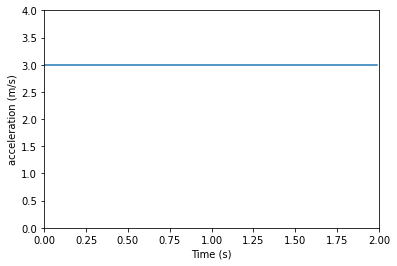

In [81]:
acceleration_vs_time.plot(xlabel = "Time (s)", ylabel = "acceleration (m/s)", xlim=(0, 2), ylim=(0, acceleration_vs_time.max() + 1))

In [82]:
print(acceleration_vs_time)

0.00    3.0
0.01    3.0
0.02    3.0
0.03    3.0
0.04    3.0
       ... 
1.95    3.0
1.96    3.0
1.97    3.0
1.98    3.0
1.99    3.0
Length: 200, dtype: float64


In [83]:
initial_velocity = 0
final_velocity = initial_velocity
for i in range(len(acceleration_vs_time)):
  area_of_rectangle = acceleration_vs_time.iloc[i] * resolution
  final_velocity = final_velocity + area_of_rectangle
  print(area_of_rectangle, "meters per second")

0.03 meters per second
0.03 meters per second
0.03 meters per second
0.03 meters per second
0.03 meters per second
0.03 meters per second
0.03 meters per second
0.03 meters per second
0.03 meters per second
0.03 meters per second
0.03 meters per second
0.03 meters per second
0.03 meters per second
0.03 meters per second
0.03 meters per second
0.03 meters per second
0.03 meters per second
0.03 meters per second
0.03 meters per second
0.03 meters per second
0.03 meters per second
0.03 meters per second
0.03 meters per second
0.03 meters per second
0.03 meters per second
0.03 meters per second
0.03 meters per second
0.03 meters per second
0.03 meters per second
0.03 meters per second
0.03 meters per second
0.03 meters per second
0.03 meters per second
0.03 meters per second
0.03 meters per second
0.03 meters per second
0.03 meters per second
0.03 meters per second
0.03 meters per second
0.03 meters per second
0.03 meters per second
0.03 meters per second
0.03 meters per second
0.03 meters

In [84]:
print("Final velocity is:", final_velocity, "meters per second")

Final velocity is: 6.000000000000005 meters per second


We nailed that one!